# Impurities measurements for nEXO

NOT UP TO DATE. SEE MOORE LAB CODE

In [1]:
# Load packages. (cf voir docstring analyser python, mypy type checker, debugging, profile template)
import elec_neg_functions as enf
import numpy as np
import matplotlib.pyplot as plt

# Global Constants.
M_nEXO = 5000  # in kg, LXe mass in nEXO
p_LXe = 5.5e-3  # in kg/liter, LXe density
M_XPM = 1.53  # in Kg, LXe mass in the XPM
C_el = 300  # in ppb/μs, constant for the XPM fits
T_room = 293  # in Kelvin, room temperature
T_LXe = 164  # in Kelvin, LXe temperature

## XPM measurement fits

Fits for the measurements made by the Xenon Purity Monitor at SLAC.

### Re-alalyzing XPM Measurement

Data from "control3" (empty XPM) in April (run start 2-10-17). From P.C. Rowson et al., Xenon Purity Monitor at SLAC

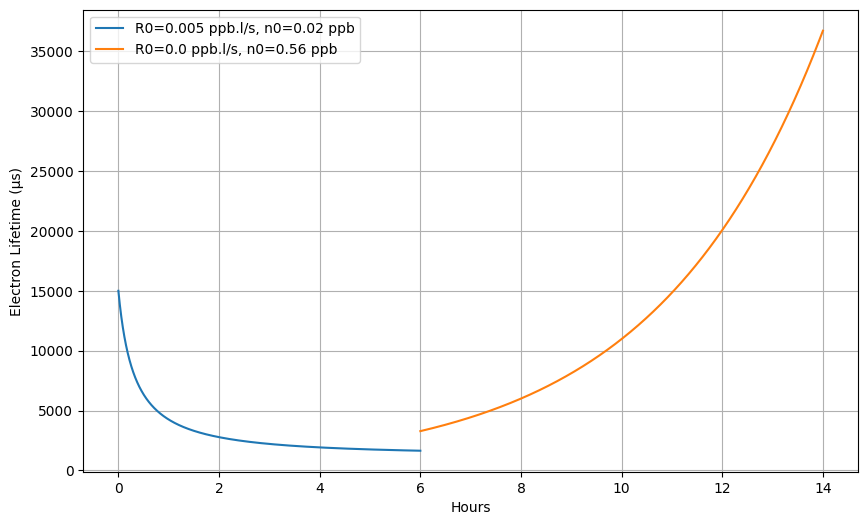

In [5]:
# Assuming
n_p = 0.0  # in ppb, purifier output impurity concentration
alpha = 0.3 * 1e3  # in μs, EXO-200 value, field dependant factor

# Given constants for first fit
F = 1.4 / 60  # in liter/sec, xenon gas circulation flow rate
eta = 1.0
eta_error = 0.3  # purification efficiency
R0 = 5.0e-3
R0_error = 1.0e-3  # in ppb liter/sec, total out-diffusion rate
n0 = 0.02
n0_error = 0.02  # in ppb, initial impurity concentration
seconds = np.arange(0, 6 * 60 * 60 + 1)
seconds = np.arange(0, 6 * 60 * 60 + 1)

# Prepare a plot with a specified figure size
plt.figure(figsize=(10, 6))

# Calculate electron lifetime and plot for each R0
electron_lifetimes = [
    enf.electron_lifetime(
        sec, M_XPM, p_LXe, n0, F, eta, R0, alpha, n_p
    )  # fonction available in older version of this repository.
    for sec in seconds
]
plt.plot(seconds / (60 * 60), electron_lifetimes, label=f"R0={R0} ppb.l/s, n0={n0} ppb")

# --------------------------------------------------------------------------------------------------------------------------------

# Given constants for second fit
R0 = 0.0e-4
R0_error = 7.4e-4  # in ppb liter/sec, total out-diffusion rate
n0 = 0.56
n0_errors = 0.12  # in ppb, initial impurity concentration
seconds = np.arange(6 * 60 * 60 + 1, 14 * 60 * 60 + 1)

# Calculate electron lifetime and plot for each R0
electron_lifetimes = [
    enf.electron_lifetime(sec, M_XPM, p_LXe, n0, F, eta, R0, alpha, n_p)
    for sec in seconds
]
plt.plot(seconds / (60 * 60), electron_lifetimes, label=f"R0={R0} ppb.l/s, n0={n0} ppb")

# Configuring the plot's settings
# plt.title('XPM Measurement for "control3"')
plt.xlabel("Hours")
plt.ylabel("Electron Lifetime (μs)")
plt.legend()
plt.grid(True)

plt.show()

Results might be different here than the ones shown on the data fits becauses of the assumed values of alpha and n_p for the XPM. When the data will be available, a fit function will be added, to do this correctly.

### Exemple with Torlon

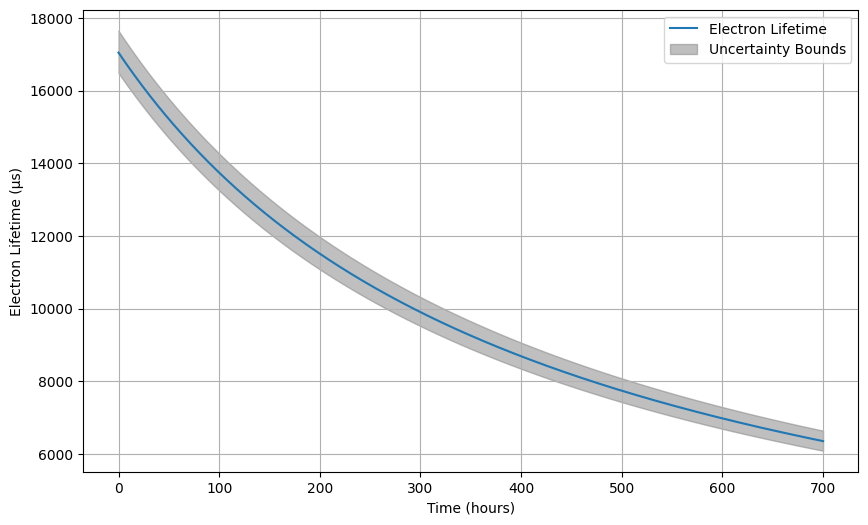

In [6]:
# Constants
n0 = 0.0176
n0_error = 6e-4
R0 = 3.27e-6
R0_error = 0.16e-6
second = np.arange(0, (700 * 60 * 60) + 1)

# Prepare a plot with a specified figure size
plt.figure(figsize=(10, 6))

# Calculate electron lifetime and its bounds
electron_lifetimes, lower_bounds, upper_bounds = enf.XPM_electron_lifetime_fit(
    second, C_el, n0, R0, p_LXe, M_XPM, n0_error, R0_error
)

# Plotting
plt.plot(second / (60 * 60), electron_lifetimes, label="Electron Lifetime")
plt.fill_between(
    second / (60 * 60),
    lower_bounds,
    upper_bounds,
    color="grey",
    alpha=0.5,
    label="Uncertainty Bounds",
)

# Configuring the plot's settings
# plt.title('XPM data fit for a Torlon sample')
plt.xlabel("Time (hours)")
plt.ylabel("Electron Lifetime (μs)")
plt.legend()
plt.grid(True)

plt.show()

### Exemple with Ultem.

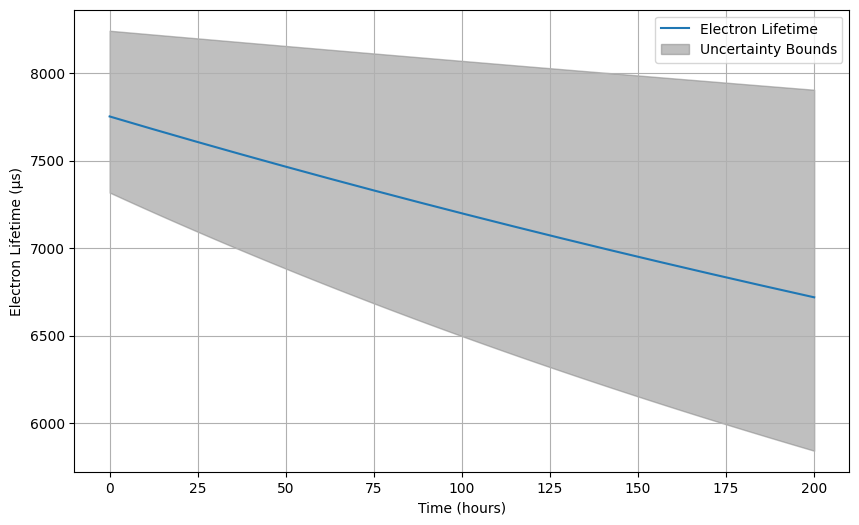

In [7]:
# Constants
n0 = 0.0387
n0_error = 2.3e-3
R0 = 2.3e-6
R0_error = 1.7e-6
second = np.arange(0, (200 * 60 * 60) + 1)

# Prepare a plot with a specified figure size
plt.figure(figsize=(10, 6))

# Calculate electron lifetime and its bounds, then plot
electron_lifetimes, lower_bounds, upper_bounds = enf.XPM_electron_lifetime_fit(
    second, C_el, n0, R0, p_LXe, M_XPM, n0_error, R0_error
)

# Plotting the main line
plt.plot(second / (60 * 60), electron_lifetimes, label="Electron Lifetime")
plt.fill_between(
    second / (60 * 60),
    lower_bounds,
    upper_bounds,
    color="grey",
    alpha=0.5,
    label="Uncertainty Bounds",
)

# Configuring the plot's settings
# plt.title('XPM data fit for a Ultem sample')
plt.xlabel("Time (hours)")
plt.ylabel("Electron Lifetime (μs)")
plt.legend()
plt.grid(True)

plt.show()